### Import the relevant libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

### Loading the dataset from the parent directory

In [2]:
current_directory = os.getcwd()

# Specify the path to the CSV file in the parent directory
csv_file_path = os.path.join(current_directory, 'Reddit_combi.csv')

In [3]:
df = pd.read_csv(csv_file_path, sep=';')
df

,title,body,Body_Title,label,Unnamed: 4
0,Envy to other is swallowing me,"Im from developingcountry, Indonesia , and for...",Envy to other is swallowing me Im from develop...,1,NaN
1,Nothin outta the ordinary. Paradise. Job stres...,Um hello ....well many can relate im sure. Aft...,Nothin outta the ordinary. Paradise. Job stres...,1,NaN
2,Almost 49 and the chasm of emptiness has never...,I’ve been diagnosed severe bi polar where you ...,Almost 49 and the chasm of emptiness has never...,1,NaN
3,I’m happy again,"After my closest friend left me in April, I ha...",I’m happy again After my closest friend left m...,0,NaN
4,Is it possible to recover from such a traumati...,"I am only 15, and yet I feel my life is alread...",Is it possible to recover from such a traumati...,1,NaN
...,...,...,...,...,...
3118,Positive relief ideas with stress?,"Hi all, my mom has been working from home sinc...","Positive relief ideas with stress? Hi all, my ...",1,NaN
3119,Breakdown,"I really think I lost my mind last night, I’d ...",Breakdown I really think I lost my mind last n...,1,NaN
3120,I feel as if I actually died a long time ago a...,I feel like I died a long time ago and I just ...,I feel as if I actually died a long time ago a...,1,NaN
3121,Is it wierd that i have imaginary friends at t...,16f ... cant manage to make friends and get ov...,Is it wierd that i have imaginary friends at t...,1,NaN


### Summary table

In [4]:
df.describe(include='all')

,title,body,Body_Title,label,Unnamed: 4
count,3123,3113,3123,3123.000000,0.0
unique,3098,3109,3123,NaN,NaN
top,Help,- he mentioned that I'll have his kids shortly...,Envy to other is swallowing me Im from develop...,NaN,NaN
freq,3,2,1,NaN,NaN
mean,NaN,NaN,NaN,0.878963,NaN
std,NaN,NaN,NaN,0.326223,NaN
min,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN
50%,NaN,NaN,NaN,1.000000,NaN
75%,NaN,NaN,NaN,1.000000,NaN


### Dropping irrelevant columns

In [5]:
df.drop(columns='Unnamed: 4', axis=1, inplace=True)

# Dropping the rows with null values
df.dropna(inplace=True)

# Summary table after dropping irrelevant columns
df.describe(include='all')

,title,body,Body_Title,label
count,3113,3113,3113,3113.000000
unique,3088,3109,3113,NaN
top,I don’t know what to do,- he mentioned that I'll have his kids shortly...,Envy to other is swallowing me Im from develop...,NaN
freq,3,2,1,NaN
mean,NaN,NaN,NaN,0.879537
std,NaN,NaN,NaN,0.325554
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,1.000000
50%,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,1.000000


### Checking for null values

In [6]:
# Checking the number of null values in each column 
df.isnull().sum()

title         0
body          0
Body_Title    0
label         0
dtype: int64

### Creating a visual graph to see the proportion of stressed and unstressed people in the dataset

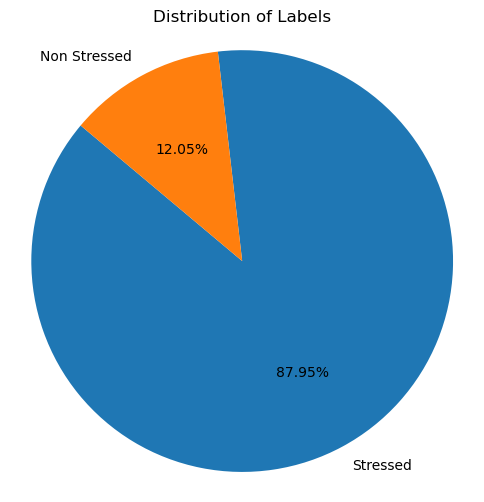

In [7]:
label_counts = df['label'].value_counts()

label_counts.index = ['Non Stressed' if i == 0 else 'Stressed' for i in label_counts.index]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Labels')
plt.show()

In [8]:
print(f'The number of stressed people in the dataset is {label_counts[0]}')
print(f'The number of people who are not stressed in the dataset is {label_counts[1]}')

The number of stressed people in the dataset is 2738
The number of people who are not stressed in the dataset is 375


### Defining a function to print word cloud to see which word appears the most in the article for stressed and unstressed

In [9]:
def wordCloud(col, label_value):
    # Filter the DataFrame based on the label value
    filtered_df = df[df['label'] == label_value]
    
    # Combine all the strings in the column into a single string
    text = ' '.join(filtered_df[col])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.title(f'Word Cloud for label {"Stress Negative" if label_value == 0 else "Stress Positive"} of column {col}')
    # plt.title(f'Word Cloud for label {label_value} of column {col}')
    plt.show()

# Example usage:
# Assuming your DataFrame is 'data' and your label column is named 'label'
# wordCloud(data, 'text_column', 'label', 0)
# wordCloud(data, 'text_column', 'label', 1)


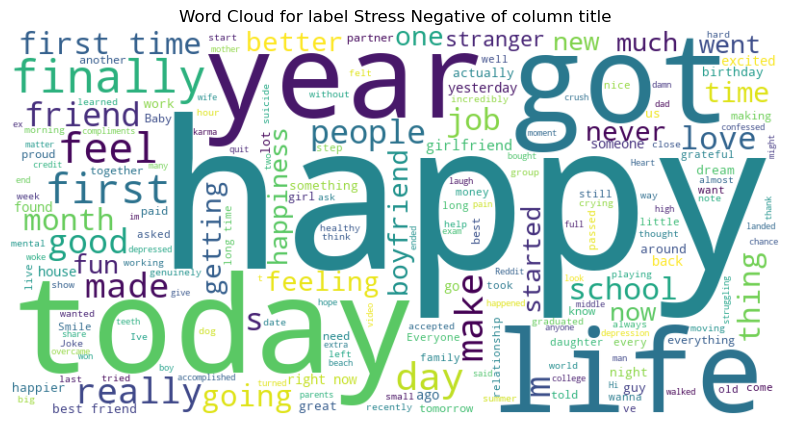

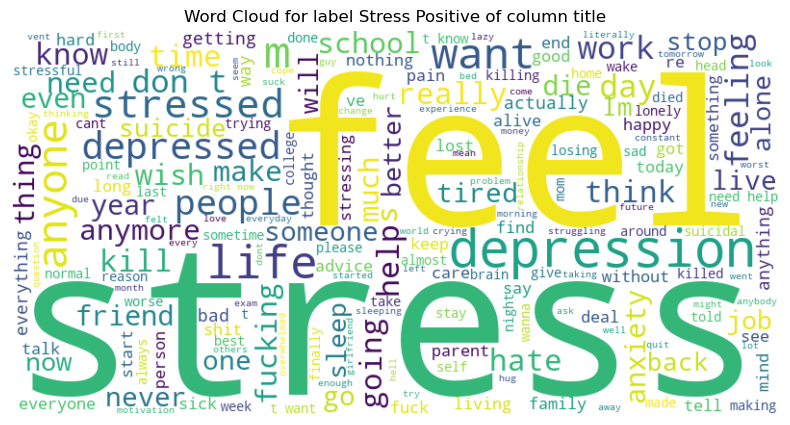

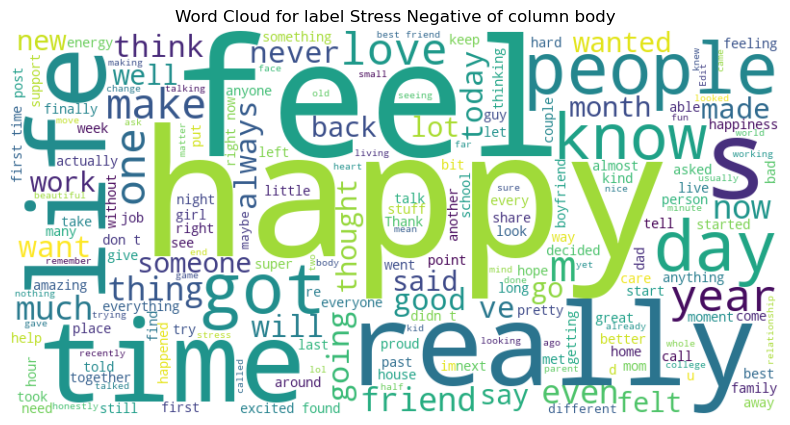

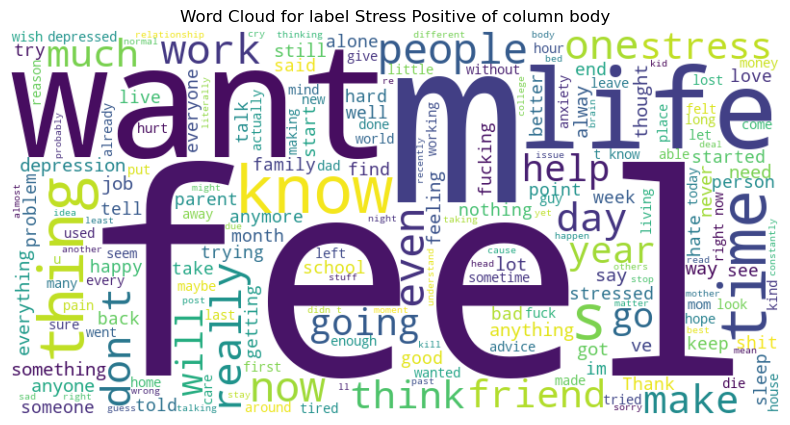

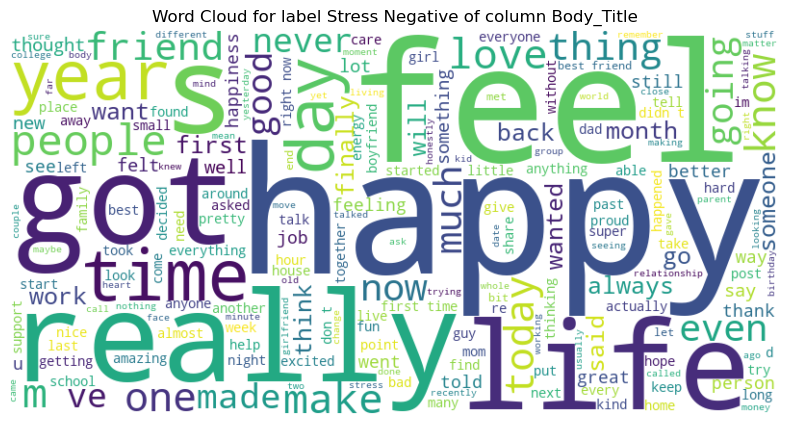

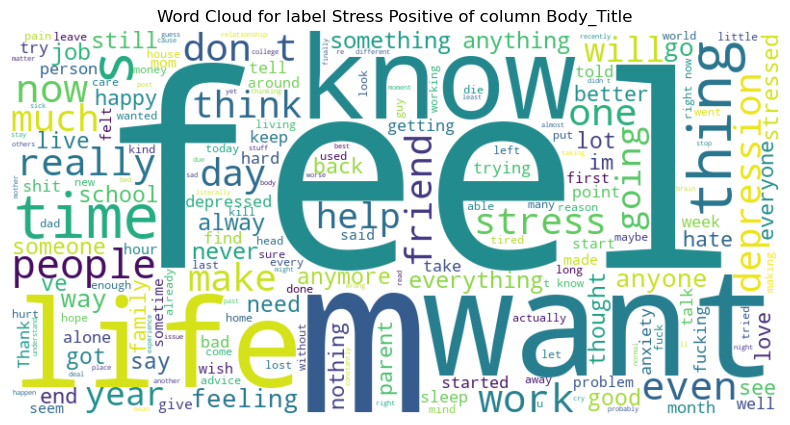

In [10]:
wordCloud('title', 0)
wordCloud('title', 1)

wordCloud('body', 0)
wordCloud('body', 1)

wordCloud('Body_Title', 0)
wordCloud('Body_Title', 1)

### Transforming the textual data into numerical matrix using count vectorizer class

In [11]:
count=CountVectorizer()
title = count.fit_transform(df['title'])
body = count.fit_transform(df['body'])
Body_Title = count.fit_transform(df['Body_Title'])

### Separating the targets (dependent var)

In [12]:
targets = df['label']

### Creating a Multilayer Perceptron model to predict whether the person is stressed or not from the article

In [13]:
def MLP(col):
    inputs =col
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

    # Implementing model with better parameter
    params = {
        'hidden_layer_sizes': [(10,10,10), (50,50,50)],
        'max_iter': [300, 400, 500]
    }
    
    mlp_clf = MLPClassifier(
        activation= 'relu',
        solver= 'adam',
        learning_rate= 'adaptive',
        early_stopping= True)
    
    mlp_clf_gsv = GridSearchCV(estimator=mlp_clf, param_grid=params)
    mlp_clf_gsv.fit(inputs_train, targets_train)
    
    mlp_clf_model = mlp_clf_gsv.best_estimator_
    mlp_clf_model.fit(inputs_train, targets_train)
    
    mlp_clf_train_score = (accuracy_score(targets_train, mlp_clf_model.predict(inputs_train)) * 100).round(2)
    mlp_clf_test_score = (accuracy_score(targets_test, mlp_clf_model.predict(inputs_test)) * 100).round(2)
    print("Train Accuracy score of the MLP Classifier model is:\t", (mlp_clf_train_score))
    print("Test Accuracy score of the MLP Classifier model is:\t", (mlp_clf_test_score))

In [14]:
print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: title")
MLP(title)

print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: body")
MLP(body)

print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: Body_Title")
MLP(Body_Title)



Accuracy of the Multilayer Perceptron model build training in the column: title
Train Accuracy score of the MLP Classifier model is:	 98.84
Test Accuracy score of the MLP Classifier model is:	 92.13


Accuracy of the Multilayer Perceptron model build training in the column: body
Train Accuracy score of the MLP Classifier model is:	 99.28
Test Accuracy score of the MLP Classifier model is:	 92.13


Accuracy of the Multilayer Perceptron model build training in the column: Body_Title
Train Accuracy score of the MLP Classifier model is:	 98.96
Test Accuracy score of the MLP Classifier model is:	 93.9


### Creating a Multinomial Naive Bayes Model to predict whether the person is stressed or not from the article

In [15]:
def MNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    multinomial_clf = MultinomialNB()
    multinomial_clf.fit(inputs_train, targets_train)
    
    multinomial_clf_train_score = (accuracy_score(targets_train, multinomial_clf.predict(inputs_train)) * 100).round(2)
    multinomial_clf_test_score = (accuracy_score(targets_test, multinomial_clf.predict(inputs_test)) * 100).round(2)

    print("Train Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_train_score))
    print("Test Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_test_score))

In [16]:
print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: title")
MNB(title)

print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: body")
MNB(body)

print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: Body_Title")
MNB(Body_Title)



Accuracy of the Multinomial NB Model build training in the column: title
Train Accuracy score of the MNB Classifier model is:	 95.46
Test Accuracy score of the MNB Classifier model is:	 91.49


Accuracy of the Multinomial NB Model build training in the column: body
Train Accuracy score of the MNB Classifier model is:	 93.69
Test Accuracy score of the MNB Classifier model is:	 91.49


Accuracy of the Multinomial NB Model build training in the column: Body_Title
Train Accuracy score of the MNB Classifier model is:	 95.22
Test Accuracy score of the MNB Classifier model is:	 92.3


### Creating a Bernoulli Naive Bayes model to predict whether the person is stressed or not from the article

In [17]:
def BNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    bernoulli_clf = BernoulliNB()
    bernoulli_clf.fit(inputs_train, targets_train)
    
    bernoulli_clf_train_score = (accuracy_score(targets_train, bernoulli_clf.predict(inputs_train)) * 100).round(2)
    bernoulli_clf_test_score = (accuracy_score(targets_test, bernoulli_clf.predict(inputs_test)) * 100).round(2)
    
    # print(f"Accuracy of the Bernoulli NB Model build training in the column: {col}")
    print("Train Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_train_score))
    print("Test Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_test_score))

In [18]:
print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: title")
BNB(title)

print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: body")
BNB(body)

print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: Body_Title")
BNB(Body_Title)



Accuracy of the Bernoulli Naive Bayes Model build training in the column: title
Train Accuracy score of the Bernoulli Naive Bayes model is:	 91.37
Test Accuracy score of the Bernoulli Naive Bayes model is:	 89.57


Accuracy of the Bernoulli Naive Bayes Model build training in the column: body
Train Accuracy score of the Bernoulli Naive Bayes model is:	 90.8
Test Accuracy score of the Bernoulli Naive Bayes model is:	 87.32


Accuracy of the Bernoulli Naive Bayes Model build training in the column: Body_Title
Train Accuracy score of the Bernoulli Naive Bayes model is:	 91.0
Test Accuracy score of the Bernoulli Naive Bayes model is:	 87.48


### From the above results, it is clear that predicting whether the person is stressed or not based on the article is more accurate when the input Body_Title is given to the model build with Multilayer Perceptron